# <center> Churn Rate Prediction </center> 
<img src = "https://insightwhale.com/wp-content/uploads/2019/08/churn-rate-formula-visual-image.png">

The churn rate is a metric that shows us the total percentage of clients who discontinue their subscriptions within a certain period.<br><br>

Understandably, a high churn rate could affect a company's profitablity and also impact growth, so it's important to keep track of a company's churn rate and try to identify patterns among clients who discontinue their subscripitons in order to develop strategies to reach these clients with a better service, bonuses or any other incentive to keep them as clients for a long period of time.<br><br>

In this project, I'll do an exploratory data analysis on a Telco dataset to find what the clients who left the company have in common and afterwards I'll develop a machine learning model for a churn prediction.

In [1]:
# Importing libraries
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, plotly.express as px
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold, cross_val_score

# Loading Data

In [2]:
df = pd.read_csv(r"C:\Users\Manav\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
# For this project, we won't use the customerID column, so let's drop it!
df.drop(columns = ['customerID'], axis=1, inplace=True)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
# Checking data types
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

**TotalCharges** should be in *float* format, just like MonthlyCharges, not in *object*. Let's change it! 

In [5]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors = 'coerce')

In [6]:
# Checking missing data
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
for col in df.columns:
    x=df[col].nunique()
    print(f'{col} has {x} unique values')

gender has 2 unique values
SeniorCitizen has 2 unique values
Partner has 2 unique values
Dependents has 2 unique values
tenure has 73 unique values
PhoneService has 2 unique values
MultipleLines has 3 unique values
InternetService has 3 unique values
OnlineSecurity has 3 unique values
OnlineBackup has 3 unique values
DeviceProtection has 3 unique values
TechSupport has 3 unique values
StreamingTV has 3 unique values
StreamingMovies has 3 unique values
Contract has 3 unique values
PaperlessBilling has 2 unique values
PaymentMethod has 4 unique values
MonthlyCharges has 1585 unique values
TotalCharges has 6530 unique values
Churn has 2 unique values


# EDA  and Visualizing Data

### Missing values

In [8]:
null = df[df.isnull().any(axis=1)]
null

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


If we look closely, we can see that all customers with null TotalCharges are those who have tenure as 0 in the dataset.<br><br>
It's possible to presume that these are **new clients** or they're on a trial period. I will, then, change their TotalCharges value to 0 instead of simply dropping them out.

In [9]:
# Filling NaN TotalCharges with a 0
df.TotalCharges = df.TotalCharges.fillna(0)

In [10]:
# Printing unique value counts for each variable
for i in df.columns:
    print(f"Column Name:{i} \n")
    print(df[i].value_counts())
    print('='*35)

Column Name:gender 

Male      3555
Female    3488
Name: gender, dtype: int64
Column Name:SeniorCitizen 

0    5901
1    1142
Name: SeniorCitizen, dtype: int64
Column Name:Partner 

No     3641
Yes    3402
Name: Partner, dtype: int64
Column Name:Dependents 

No     4933
Yes    2110
Name: Dependents, dtype: int64
Column Name:tenure 

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
Column Name:PhoneService 

Yes    6361
No      682
Name: PhoneService, dtype: int64
Column Name:MultipleLines 

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Column Name:InternetService 

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
Column Name:OnlineSecurity 

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
Column Name:OnlineBac

### Visualizing Data

In [ ]:
# Visualizing Churn proportion
fig = px.pie(df, names = 'Churn', template = 'seaborn',title = 'Churn Proportion')
fig.update_traces(rotation=90, pull = [0.1], textinfo = "percent+label")
fig.show()

The first thing we notice here is that our **target variable** is unbalanced, which means we have a much larger proportion of one specific class over another.<br><br>
Only 26.5% of clients in the dataset were those who left the company. 

In [ ]:
# Statistics on churn x tenure
print(df.groupby('Churn').tenure.describe().round(0))
# Visualizing how churn interacts with tenure
fig = px.box(df, x = 'tenure', y = 'Churn', template = 'seaborn',
            title = 'Churn x Tenure')
fig.show()

It's possible to conclude that 75% of clients who discontinue their subscriptions do so within the first 29 months of service. Half of them leave untill the 10th month, not even staying for a year as clients. 

In [ ]:
# Statistics on churn x monthly charges
print(df.groupby('Churn').MonthlyCharges.describe().round(0))
# Visualizing how churn interacts with monthly charges
fig = px.box(df, x = 'MonthlyCharges', y = 'Churn', template = 'seaborn',
            title = 'Churn x Monthly Charges')
fig.show()

Now, this is **some interesting** information!<br><br>
Through the boxplot above, it's clear to see that customers who leave are those who pay more monthly for their services! <br><br>
Averagely, the monthly cost for these clients was 21.31% higher than the average cost for clients who stayed in the company! Even among the clients who paid less, the ones who left the company still paid 124% more than those who stayed.

In [14]:
# Statistics on churn x total charges
print(df.groupby('Churn').TotalCharges.describe().round(0))
# Visualizing how churn interacts with total charges
fig = px.box(df, x = 'TotalCharges', y = 'Churn', template = 'seaborn',
            title = 'Churn x Total Charges')
fig.show()

Even though clients who leave the company pay more monthly, those who stay as clients end up with higher amounts of total charges. It isn't surprising, since they usually stay longer with us, so their total amount of payments will be higher than those who left the company much earlier.

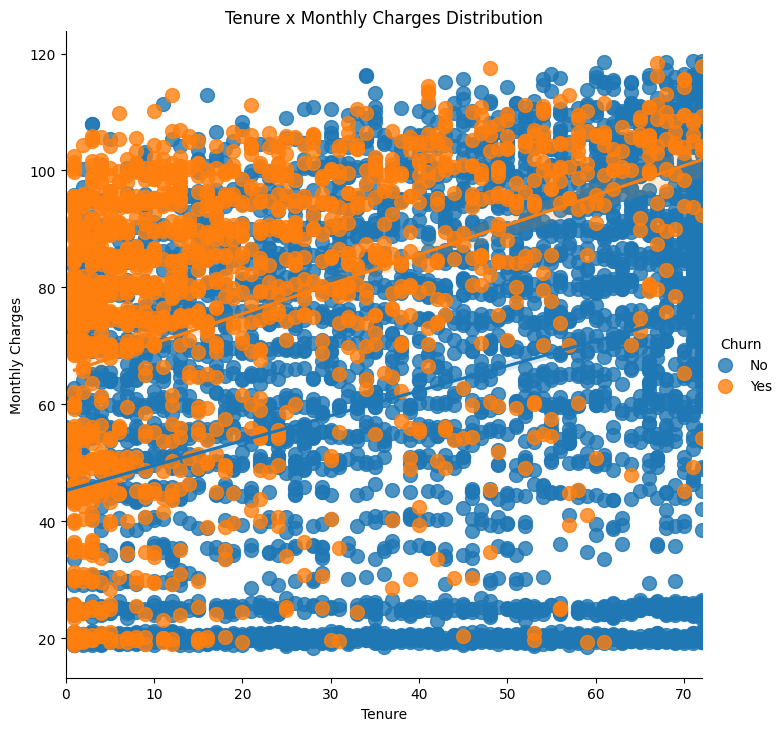

In [15]:
# Tenure x Monthly Charges distribution
g = sns.lmplot(height = 7, data = df, x = 'tenure', y = 'MonthlyCharges',
              hue = 'Churn', scatter_kws={'s': 100}, line_kws = None)
g.set(xlabel = 'Tenure',
     ylabel = 'Monthly Charges')
g = plt.title('Tenure x Monthly Charges Distribution')

Not only can we see a large concentration of clients who left the company in the upper left part of the plot above, but we can also see a higher trendline for clients who left, confirming that they do have higher charges per month than those who stay.

Let's now check how the variable **churn** relates to the categorical variables

In [16]:
# Creating a Dataframe containing only clients who left
churn = df[df['Churn']=='Yes']
churn

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
13,Male,0,No,No,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,Male,0,No,No,12,Yes,No,DSL,No,No,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,727.80,Yes
7026,Female,0,No,No,9,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,Yes
7032,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes
7034,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes


In [17]:
# Churn x gender
fig = px.pie(churn, names = 'gender', template = 'seaborn',
            title = 'Churn x Gender')
fig.update_traces(pull = [0.1], textinfo = "percent+label")
fig.show()

In [18]:
# Churn x SeniorCitizen
#How many are Senior Citizens have churned
fig = px.pie(churn, names = ['No','Yes'],template = 'seaborn', 
            values=churn.SeniorCitizen.value_counts(),
             title = 'Churn x Senior Citizen')
fig.update_traces(pull = [0.1], textinfo = "percent+label")
fig.show()

In [19]:
# Churn x dependents
fig = px.pie(churn, names = 'Dependents', template = 'seaborn',
            title = 'Churn x Dependents')
fig.update_traces(pull = [0.1], textinfo = "percent+label")
fig.show()

In [20]:
# Churn x partner
fig = px.pie(churn, names = 'Partner', template = 'seaborn',
            title = 'Churn x Partner')
fig.update_traces(pull = [0.1], textinfo = "percent+label")
fig.show()

In [21]:
# Churn x Phone Service
fig = px.pie(churn, names = 'PhoneService', template = 'seaborn',
            title = 'Churn x Phone Service')
fig.update_traces(pull = [0.1], textinfo = "percent+label")
fig.show()

In [22]:
# Churn x Paperless Billing
fig = px.pie(churn, names = 'PaperlessBilling', template = 'seaborn',
            title = 'Churn x Paperless Billing')
fig.update_traces(pull = [0.1], textinfo = "percent+label")
fig.show()

When we analyzed categorical information regarding clients who have left the company, we can draw a few conclusions about this type of client.<br><br>
- First, we have a lot of indicators showing that these clients are **young**, probably in their 20's and early 30's, considering that they're mostly not senior citizens, 82.6% of them have no dependents and 64.2% have no partners.<br><br>
- Secondly, they also prefer paperless billing which makes me wonder if everything is ok with how these clients are receiving their bills! Are they receiving them in their emails? Is the service good enough and easily allowing them to pay their bills with no trouble? Are they receiving their bills at the right time and on the right platform?

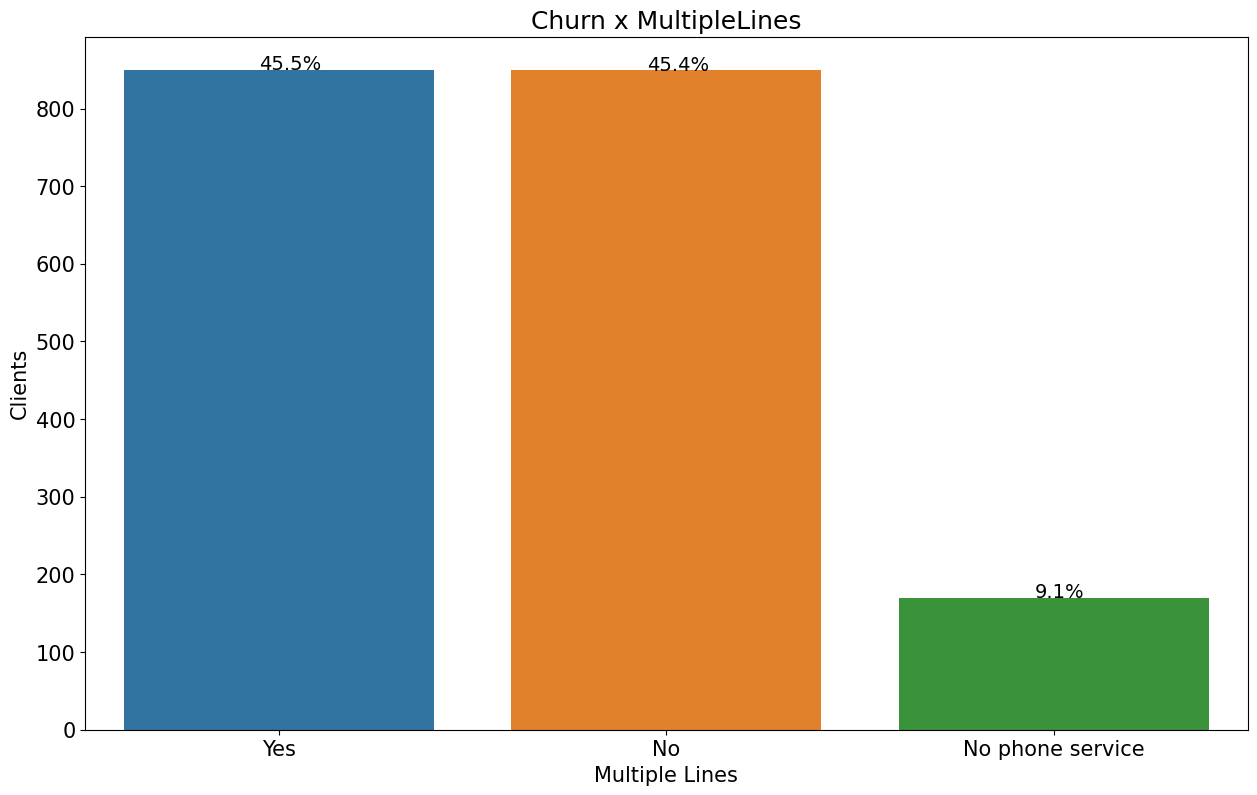

In [23]:
# Churn x Multiple Lines
plt.figure(figsize=(15,9))
ax = sns.countplot(x = 'MultipleLines',
                data = churn, order =churn['MultipleLines'].value_counts().index)
plt.ylabel('Clients', fontsize=15)
plt.xlabel('Multiple Lines', fontsize = 15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('Churn x MultipleLines', size = 18)
#Annotating with percentages
def percent(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 14)
percent(ax, churn.MultipleLines)

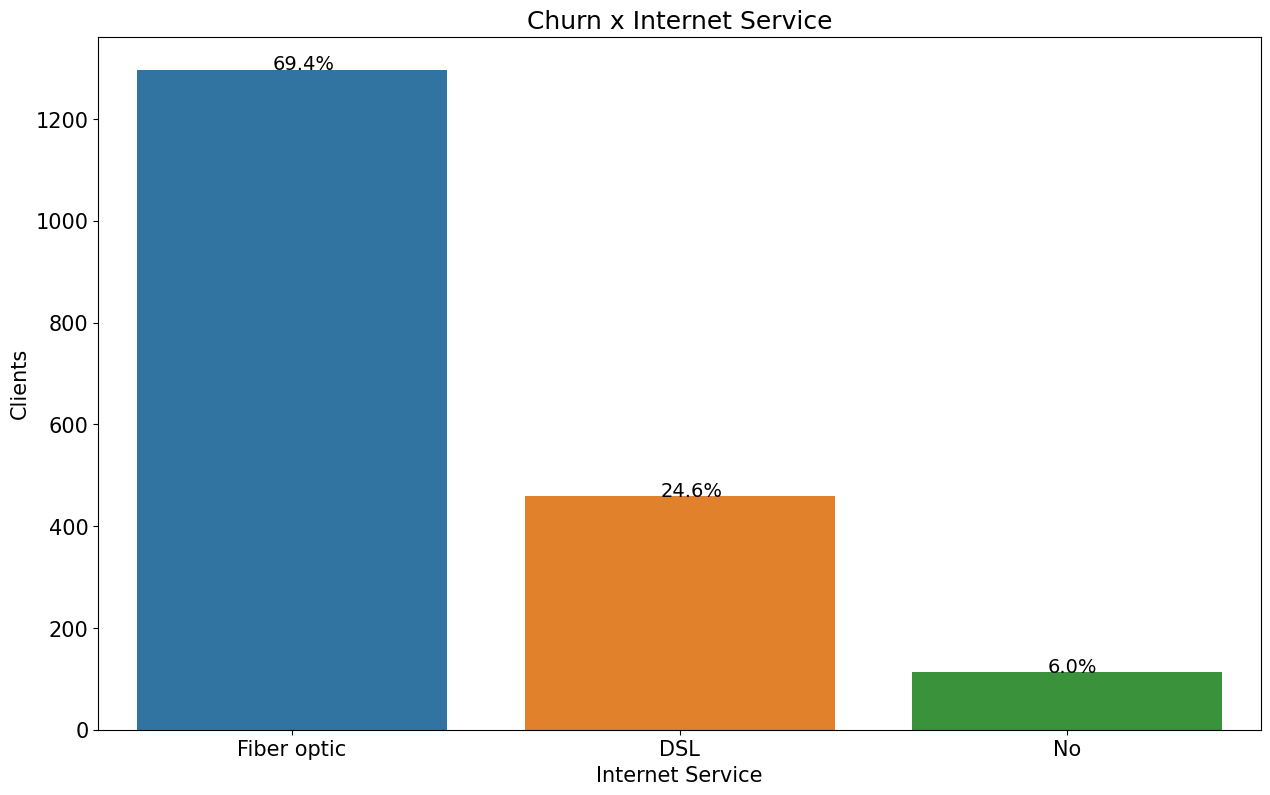

In [24]:
# Churn x Internet Service
plt.figure(figsize=(15,9))
ax = sns.countplot(x = 'InternetService',
                data = churn, order =churn['InternetService'].value_counts().index)
plt.ylabel('Clients', fontsize=15)
plt.xlabel('Internet Service', fontsize = 15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('Churn x Internet Service', size = 18)
percent(ax, churn.InternetService)

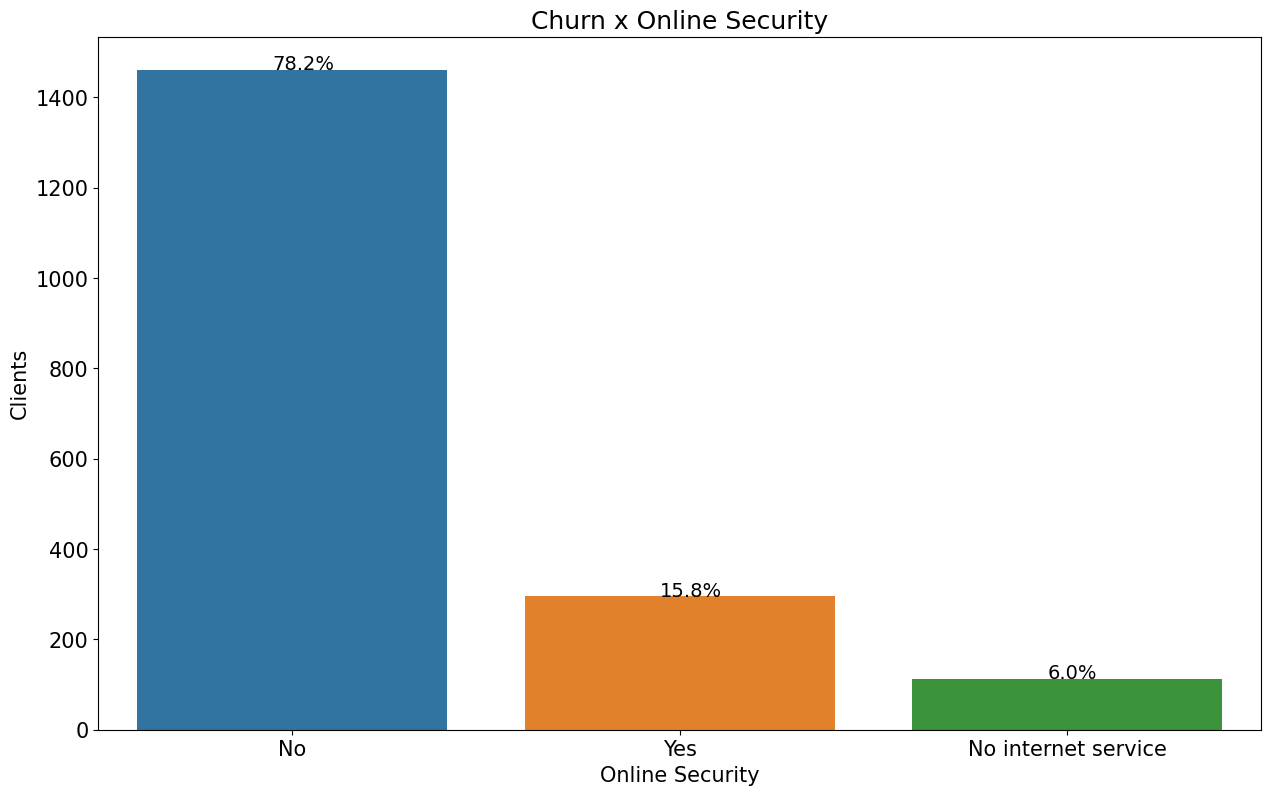

In [25]:
# Churn x Online Security
plt.figure(figsize=(15,9))
ax = sns.countplot(x = 'OnlineSecurity',
                data = churn, order =churn['OnlineSecurity'].value_counts().index)
plt.ylabel('Clients', fontsize=15)
plt.xlabel('Online Security', fontsize = 15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('Churn x Online Security', size = 18)
percent(ax, churn.OnlineSecurity)

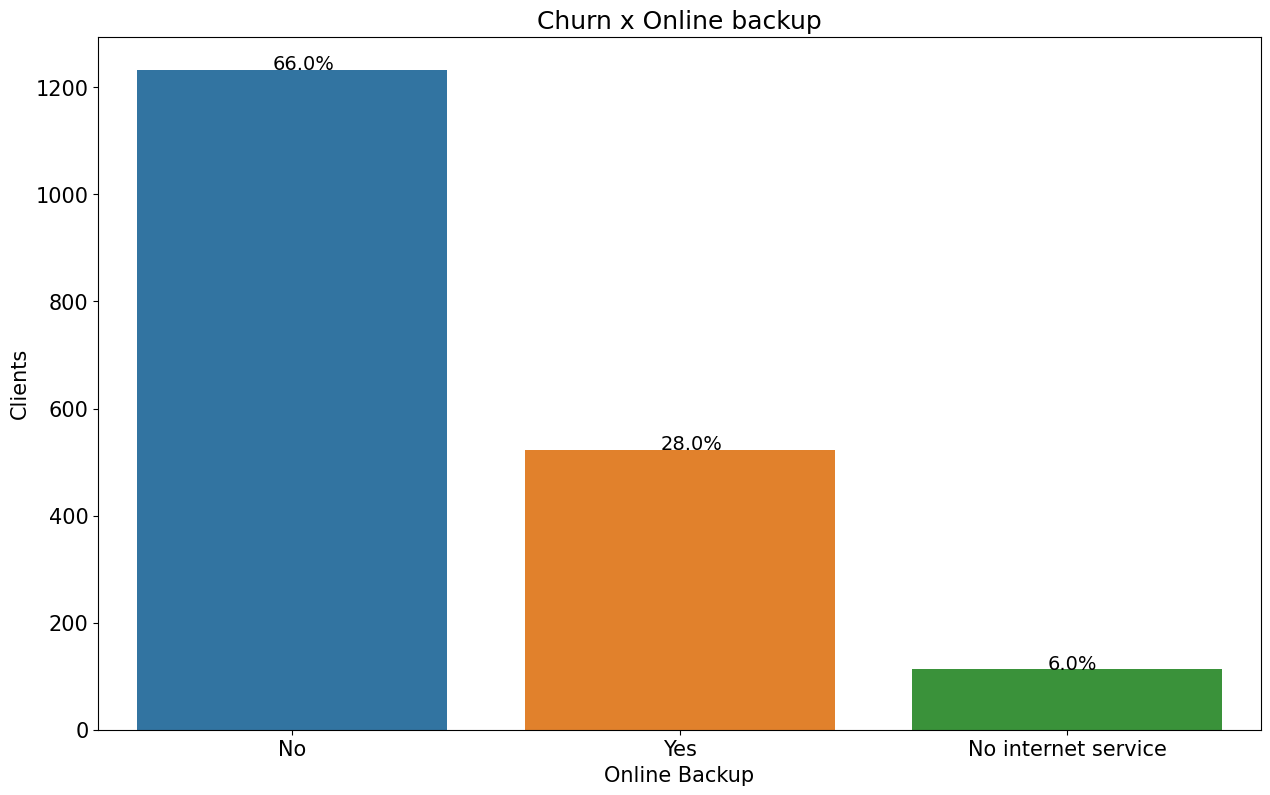

In [26]:
# Churn x Online Backup
plt.figure(figsize=(15,9))
ax = sns.countplot(x = 'OnlineBackup',
                data = churn, order =churn['OnlineBackup'].value_counts().index)
plt.ylabel('Clients', fontsize=15)
plt.xlabel('Online Backup', fontsize = 15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('Churn x Online backup', size = 18)
percent(ax, churn.OnlineBackup)

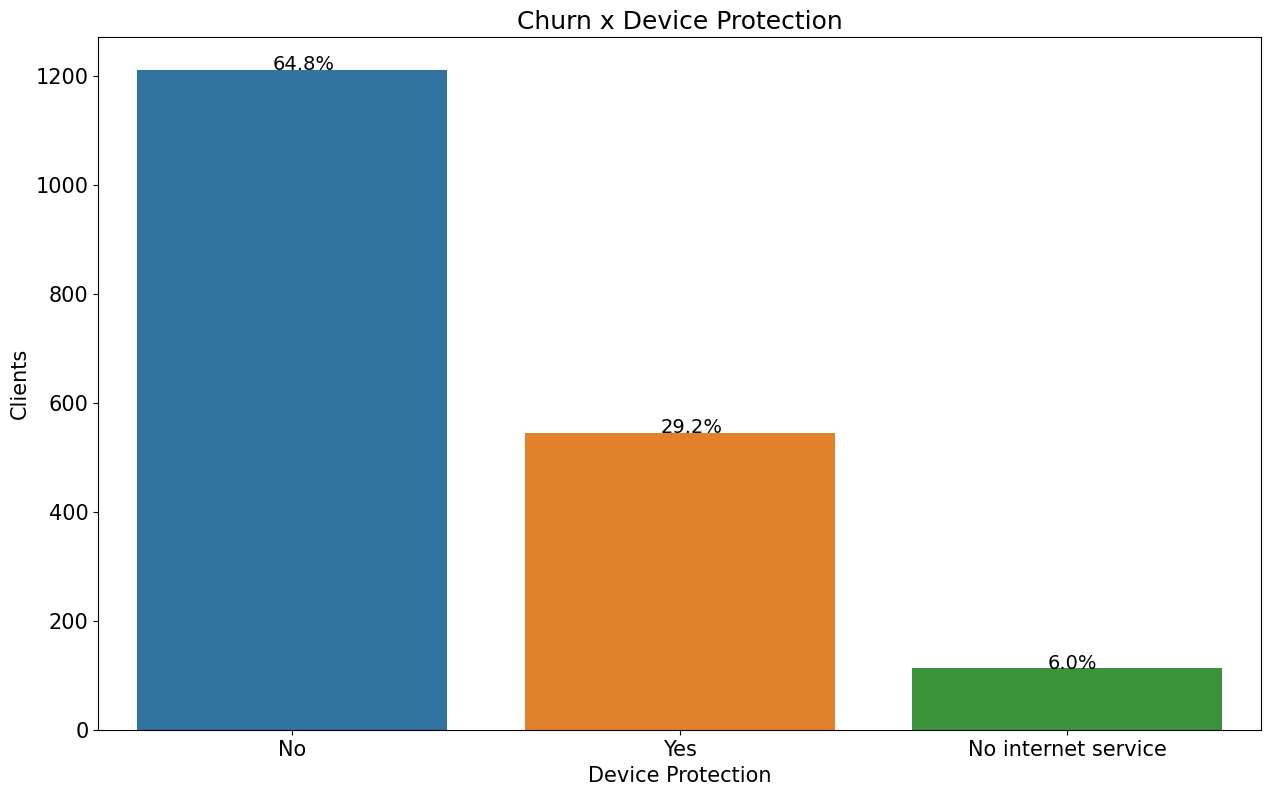

In [27]:
# Churn x Device Protection
plt.figure(figsize=(15,9))
ax = sns.countplot(x = 'DeviceProtection',
                data = churn, order =churn['DeviceProtection'].value_counts().index)
plt.ylabel('Clients', fontsize=15)
plt.xlabel('Device Protection', fontsize = 15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('Churn x Device Protection', size = 18)
percent(ax, churn.DeviceProtection)

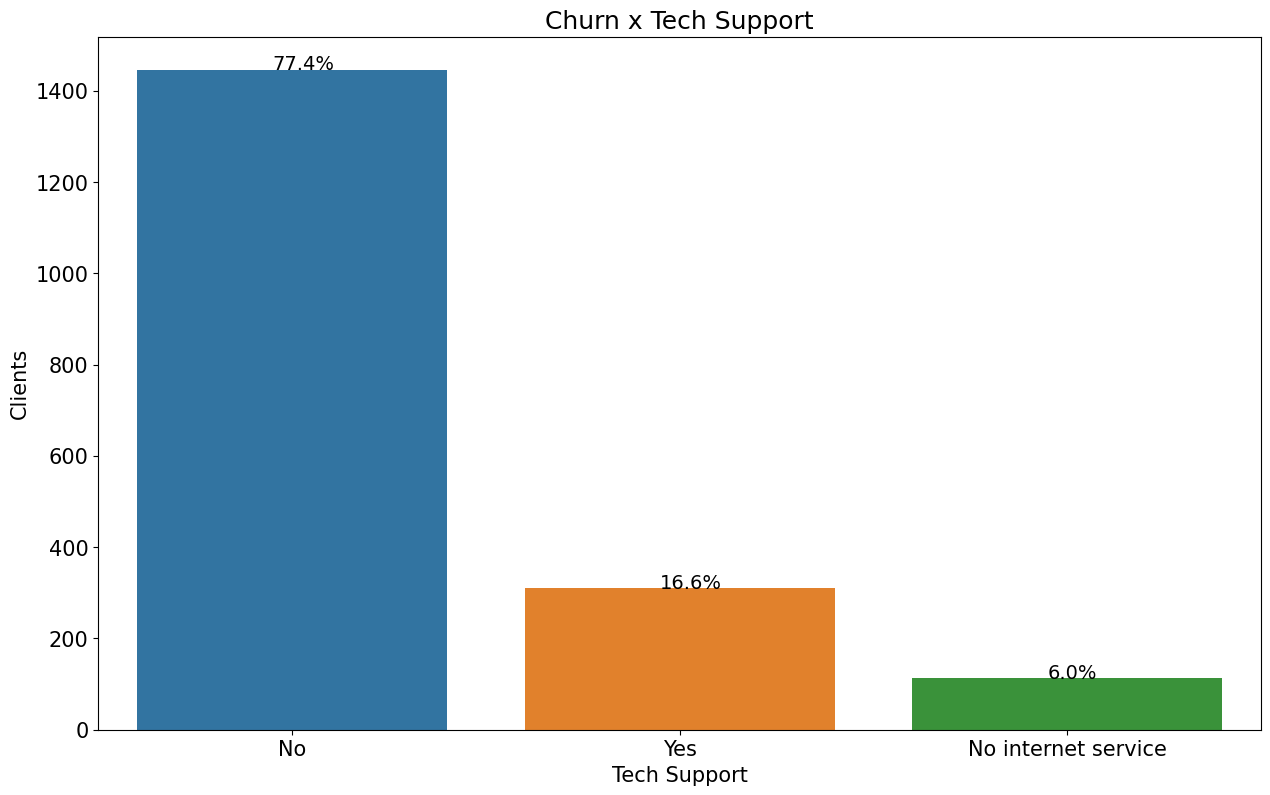

In [28]:
# Churn x Tech Support
plt.figure(figsize=(15,9))
ax = sns.countplot(x = 'TechSupport',
                data = churn, order =churn['TechSupport'].value_counts().index)
plt.ylabel('Clients', fontsize=15)
plt.xlabel('Tech Support', fontsize = 15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('Churn x Tech Support', size = 18)
percent(ax, churn.TechSupport)

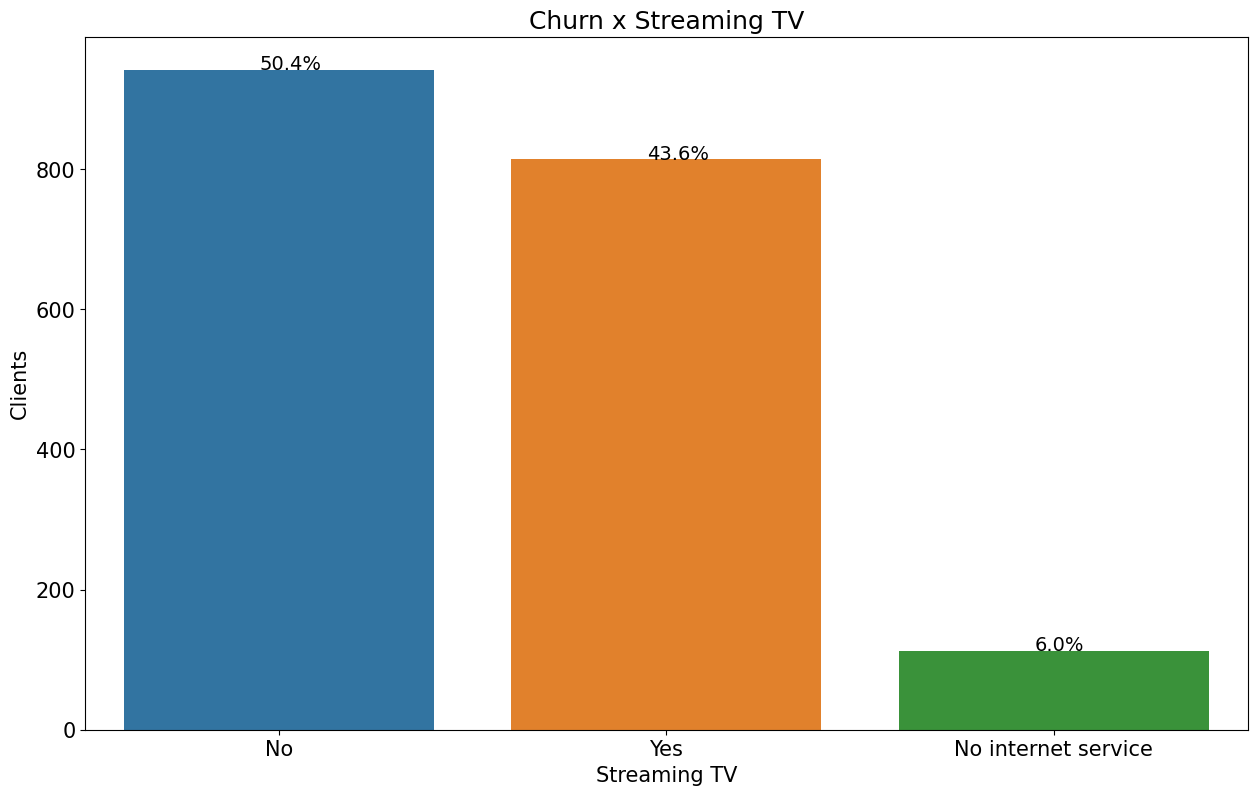

In [29]:
# Churn x Streaming TV
plt.figure(figsize=(15,9))
ax = sns.countplot(x = 'StreamingTV',
                data = churn, order =churn['StreamingTV'].value_counts().index)
plt.ylabel('Clients', fontsize=15)
plt.xlabel('Streaming TV', fontsize = 15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('Churn x Streaming TV', size = 18)
percent(ax, churn.StreamingTV)

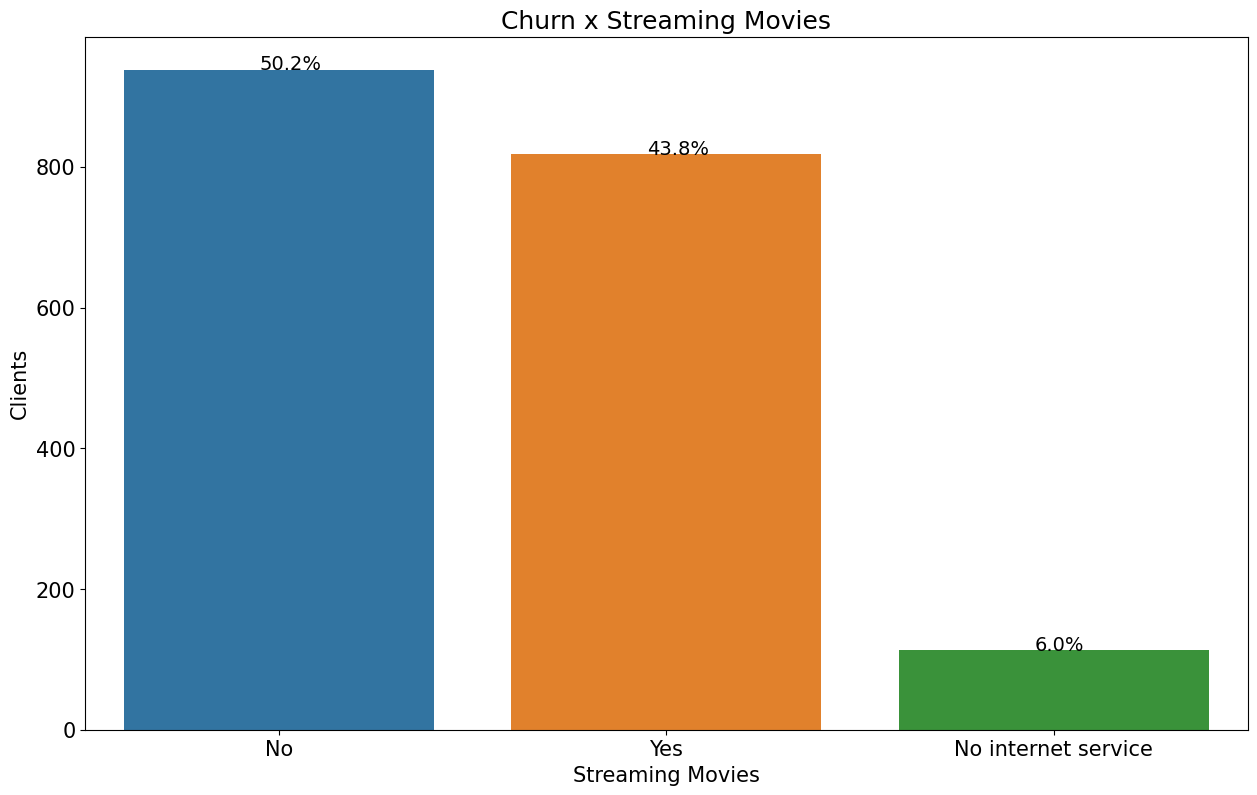

In [30]:
# Churn x Streaming Movies 
plt.figure(figsize=(15,9))
ax = sns.countplot(x = 'StreamingMovies',
                data = churn, order =churn['StreamingMovies'].value_counts().index)
plt.ylabel('Clients', fontsize=15)
plt.xlabel('Streaming Movies', fontsize = 15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('Churn x Streaming Movies', size = 18)
percent(ax, churn.StreamingMovies)

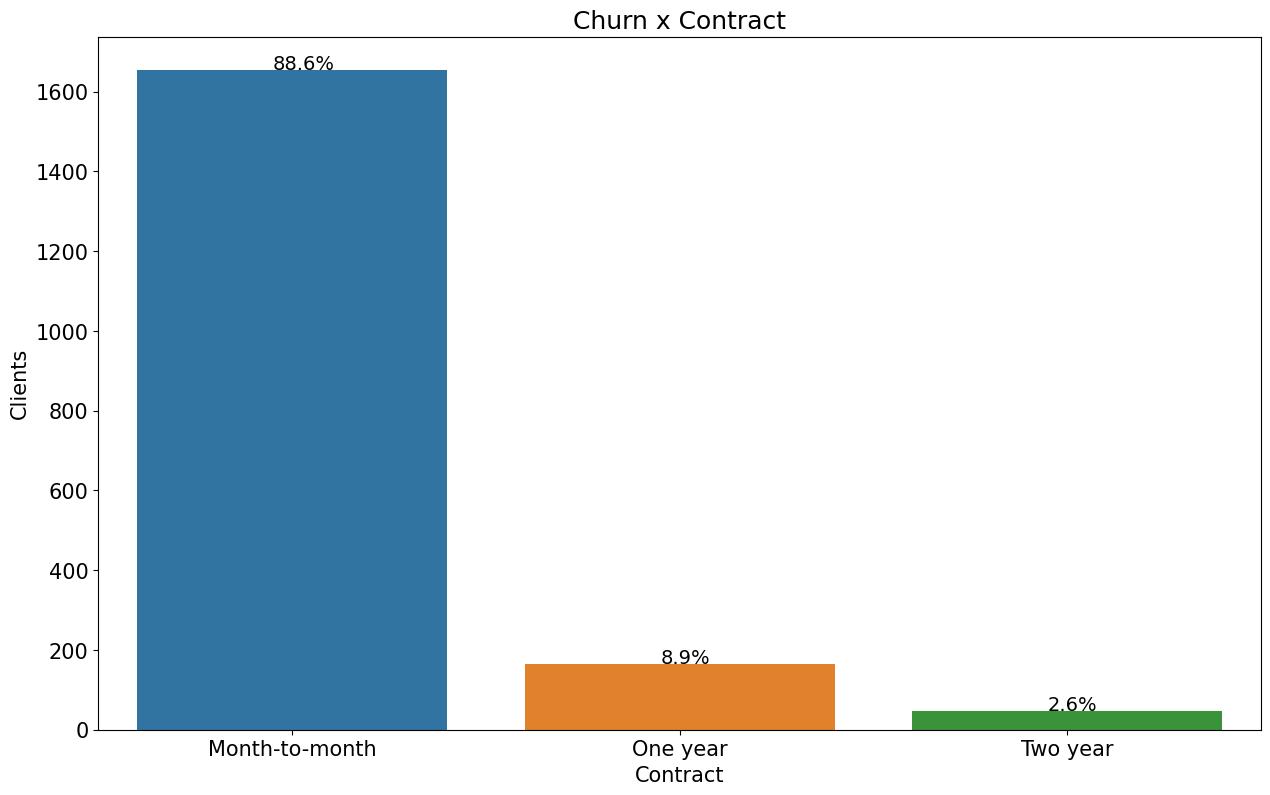

In [31]:
# Churn x Contract
plt.figure(figsize=(15,9))
ax = sns.countplot(x = 'Contract',
                data = churn, order =churn['Contract'].value_counts().index)
plt.ylabel('Clients', fontsize=15)
plt.xlabel('Contract', fontsize = 15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('Churn x Contract', size = 18)
percent(ax, churn.Contract)

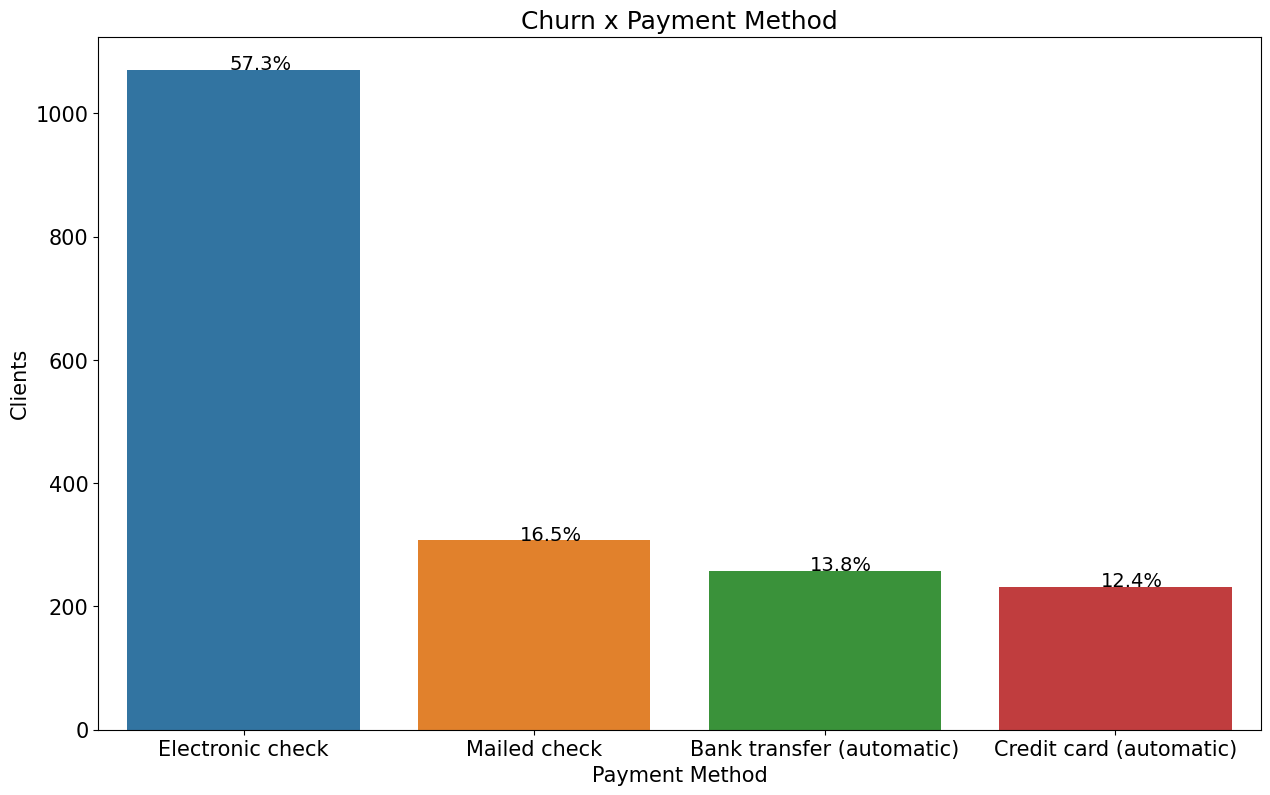

In [32]:
# Churn x Payment Method
plt.figure(figsize=(15,9))
ax = sns.countplot(x = 'PaymentMethod',
                data = churn, order =churn['PaymentMethod'].value_counts().index)
plt.ylabel('Clients', fontsize=15)
plt.xlabel('Payment Method', fontsize = 15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title('Churn x Payment Method', size = 18)
percent(ax, churn.PaymentMethod)

Some intriguing facts pop up when analyzing multicategory variables.<br><br>
- Clients who left don't sign up for additional services, meaning they're left without tech support, device protection, backup security, etc. This could definitely be a problem! What if clients are leaving because they don't have tech support to help them with an issue they're facing? Or they've had issues with their devices and they weren't covered? <br><br>
- Most of them had fiber-optic services. Is it possible that the company may have some improvements to make regarding this kind of service? Or better yet, what if these clients are from a certain region where fiber optic services may be suffering issues? It would be valuable to have region information in this dataset to know where these clients are from.<br><br>
- 88.6% of clients are on a month-to-month contract and that's a huge difference between the proportion of churn clients who were on one-year and two-year contracts. We can definitely see that a month-to-month contract makes it easier for clients to cancel their subscription, so we should offer them benefits to make both the yearly and biyearly contracs much more appealing than a month-to-month contract.<br><br>
- Lastly, most clients opted for an electronic check as a payment method and once again the question arises, do these checks get sent to the right platforms at the right time? Are we having any issues regarding the electronic check payment service?<br><br>


With this information, the company now has a profile in mind of clients who discontinued their subscriptions and now can develop some studies to track each one of these problems down and act on strategies to retain these clients.

# Feature Engineering

In [33]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Feature Extraction

In [34]:
# Create an annual categorical variable from the variable Tenure
df.loc[(df["tenure"]>=0) & (df["tenure"]<=12),"NEW_TENURE_YEAR"] = "0-1 Year"
df.loc[(df["tenure"]>12) & (df["tenure"]<=24),"NEW_TENURE_YEAR"] = "1-2 Year"
df.loc[(df["tenure"]>24) & (df["tenure"]<=36),"NEW_TENURE_YEAR"] = "2-3 Year"
df.loc[(df["tenure"]>36) & (df["tenure"]<=48),"NEW_TENURE_YEAR"] = "3-4 Year"
df.loc[(df["tenure"]>48) & (df["tenure"]<=60),"NEW_TENURE_YEAR"] = "4-5 Year"
df.loc[(df["tenure"]>60) & (df["tenure"]<=72),"NEW_TENURE_YEAR"] = "5-6 Year"

In [35]:
# Specify customers with a 1 or 2 year contract as Engaged

df["NEW_Engaged"] = df["Contract"].apply(lambda x: 1 if x in ["One year","Two year"] else 0)

In [36]:
# People who do not receive any support, backup or protection
df["NEW_noProt"] = df.apply(lambda x: 1 if (x["OnlineBackup"] != "Yes") or (x["DeviceProtection"] != "Yes") or (x["TechSupport"] != "Yes") else 0, axis=1)

In [37]:
# Young customers with a monthly contract
df["NEW_Young_Not_Engaged"] = df.apply(lambda x: 1 if (x["NEW_Engaged"] == 0) and (x["SeniorCitizen"] == 0) else 0, axis=1)

In [38]:
# Total number of services received by the person

df['NEW_TotalServices'] = (df[['PhoneService', 'InternetService', 'OnlineSecurity',
                                       'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                       'StreamingTV', 'StreamingMovies']]== 'Yes').sum(axis=1)

In [39]:
# Does the person make automatic payments?

df["NEW_FLAG_AutoPayment"] = df["PaymentMethod"].apply(lambda x: 1 if x in ["Bank transfer (automatic)","Credit card (automatic)"] else 0)

In [40]:
# Fee per service

df["NEW_AVG_Service_Fee"] = df["MonthlyCharges"] / (df['NEW_TotalServices'] + 1)

In [41]:
# Let's split our dataset into independent (X) and dependent (y) variables
X = df.drop('Churn', axis = 1)
y = df.Churn

In [42]:
#Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)
print('X train size: ', len(X_train))
print('X test size: ', len(X_test))
print('y train size: ', len(y_train))
print('y test size: ', len(y_test))

X train size:  4930
X test size:  2113
y train size:  4930
y test size:  2113


In [43]:
categorical_features=['PaymentMethod','Contract','InternetService']#to be one hot encoded
numerical_features=['TotalCharges','tenure','MonthlyCharges','NEW_Engaged','NEW_noProt','NEW_Young_Not_Engaged','NEW_TotalServices','NEW_FLAG_AutoPayment','NEW_AVG_Service_Fee']
ordinal_features=[]
for i in df.columns:
    if i not in categorical_features and i not in numerical_features and i !='Churn':
        ordinal_features.append(i)

categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse=False)
numerical_transformer = StandardScaler().set_output(transform='pandas')
ordinal_transformer=OrdinalEncoder()

In [44]:
#Standardizing Numeric variables
X_train[numerical_features] = numerical_transformer.fit_transform(X_train[numerical_features])
X_test[numerical_features] = numerical_transformer.transform(X_test[numerical_features])

In [45]:
#Ordinal Encoding varibales
X_train[ordinal_features] = ordinal_transformer.fit_transform(X_train[ordinal_features])
X_test[ordinal_features] = ordinal_transformer.transform(X_test[ordinal_features])

In [46]:
#One hot encoding variables
encoded_features_train= categorical_transformer.fit_transform(X_train[categorical_features])
encoded_features_test = categorical_transformer.transform(X_test[categorical_features])

C:\python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [47]:
X_train.drop(categorical_features,axis=1,inplace=True)
X_test.drop(categorical_features,axis=1,inplace=True)

In [48]:
df_encoded_train = pd.DataFrame(encoded_features_train, columns=categorical_transformer.get_feature_names_out(categorical_features))
df_encoded_test=pd.DataFrame(encoded_features_test, columns=categorical_transformer.get_feature_names_out(categorical_features))

In [49]:
#reseting index before concatenating
X_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)
df_encoded_train.reset_index(drop=True,inplace=True)
df_encoded_test.reset_index(drop=True,inplace=True)

In [50]:
X_train= pd.concat([X_train, df_encoded_train], axis=1)
X_test= pd.concat([X_test,df_encoded_test], axis=1)

In [51]:
print(X_train.shape)
print(X_test.shape)

(4930, 33)
(2113, 33)


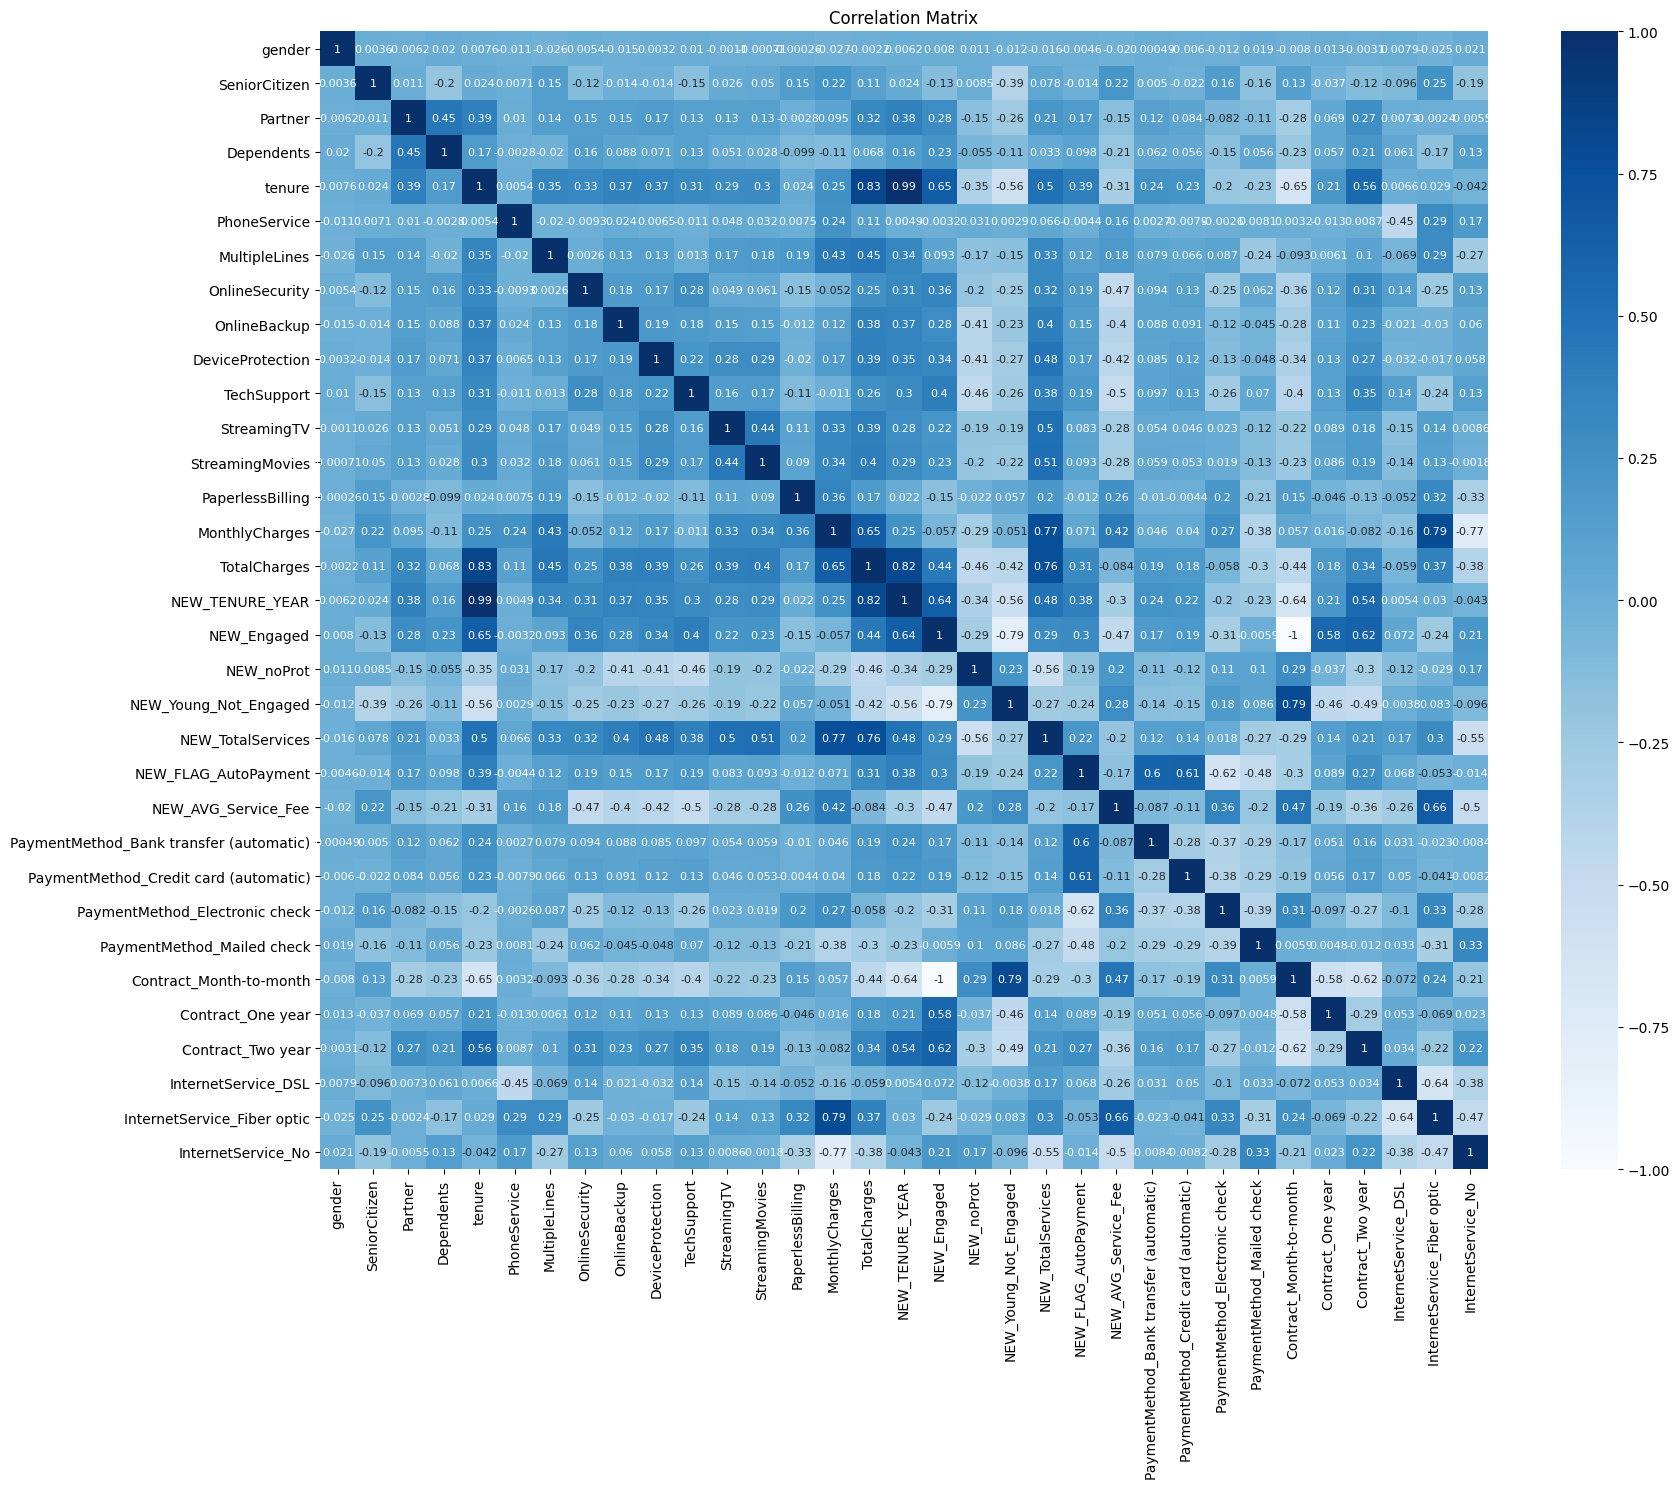

In [52]:
#Correlation analysis among features
plt.figure(figsize=(18, 15))
sns.heatmap(X_train.corr(),annot=True,cmap='Blues',annot_kws={"fontsize": 8})
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [53]:
# Transform Churns into binary values
y_train.replace({'Yes' : 1,
                'No' : 0}, inplace = True)
y_train.value_counts()

0    3589
1    1341
Name: Churn, dtype: int64

In [54]:
# Transform Churns into binary values
y_test.replace({'Yes' : 1,
                'No' : 0}, inplace = True)
y_test.value_counts()

0    1585
1     528
Name: Churn, dtype: int64

In [55]:
# Dealing with imbalanced data 
y_train.value_counts()

0    3589
1    1341
Name: Churn, dtype: int64

In [56]:
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

In [57]:
y_train.value_counts()

0    3589
1    3589
Name: Churn, dtype: int64

## Model Training

In [85]:
#Running SVC
svc = SVC(kernel='linear',probability=True,random_state=42)  
svc.fit(X_train, y_train)
svc_y_pred = svc.predict(X_test)
svc_y_proba=svc.predict_proba(X_test)[:,1]

#Running Ada Boost
base_estimator = DecisionTreeClassifier(max_depth=1,random_state=42)
ab = AdaBoostClassifier(base_estimator=base_estimator,random_state=42)
ab.fit(X_train, y_train)
ab_y_predict = ab.predict(X_test)
ab_y_pred = ab.predict(X_test)
ab_y_proba=ab.predict_proba(X_test)[:,1]

# Running Gradient Boosting
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
gb_y_predict = gb.predict(X_test)
gb_y_pred = gb.predict(X_test)
gb_y_proba=gb.predict_proba(X_test)[:,1]

C:\python311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



Accuracy: 75.06%
Precision: 50.06%
Recall: 82.39%
F1_Score: 62.28%
Gini Score : 0.8576337109262977


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

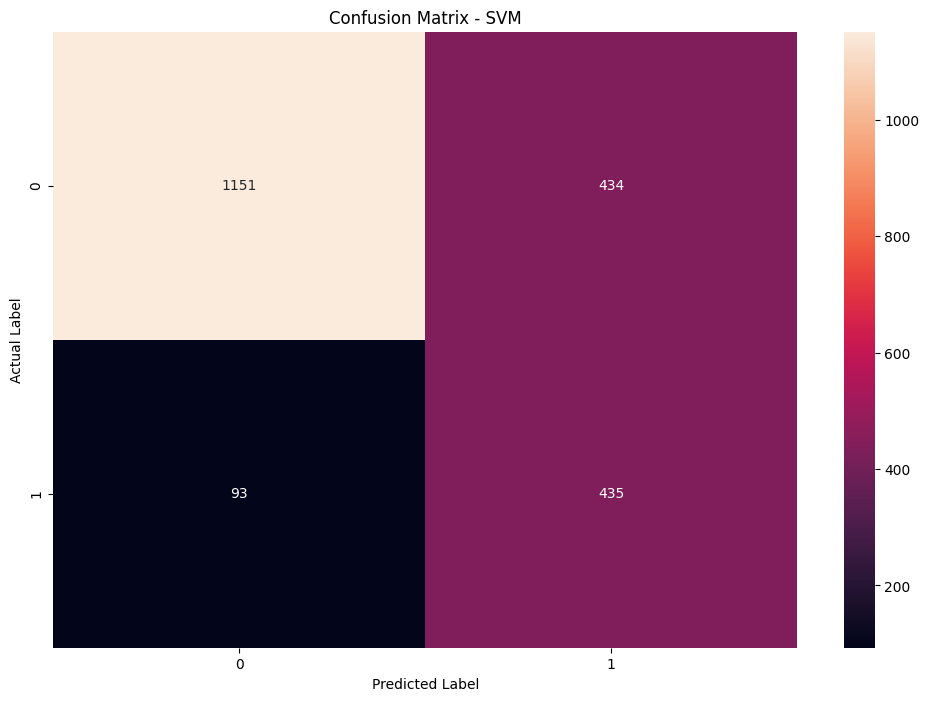

In [86]:
#svc
print('Accuracy: %.2f%%' % (accuracy_score(y_test, svc_y_pred) * 100 ))
print('Precision: %.2f%%' % (precision_score(y_test, svc_y_pred) * 100))
print('Recall: %.2f%%' % (recall_score(y_test, svc_y_pred) * 100))
print('F1_Score: %.2f%%' % (f1_score(y_test, svc_y_pred) * 100))
print(f'Gini Score : {roc_auc_score(y_test, svc_y_proba)}')

confusion_matrix_rf = confusion_matrix(y_test, svc_y_pred)
plt.figure(figsize=(12,8))
ax = plt.subplot()
sns.heatmap(confusion_matrix_rf, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_title('Confusion Matrix - SVM')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

Accuracy: 78.32%
Precision: 55.04%
Recall: 72.35%
F1_Score: 62.52%
Gini Score : 0.8588812016059649


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

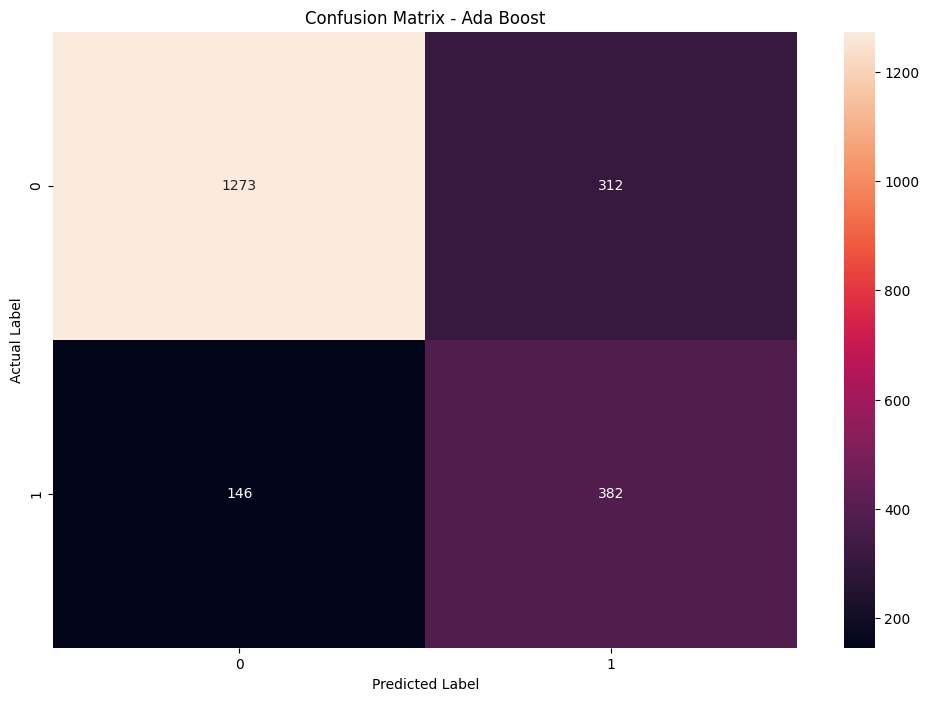

In [87]:
# Ada Boost
print('Accuracy: %.2f%%' % (accuracy_score(y_test, ab_y_predict) * 100 ))
print('Precision: %.2f%%' % (precision_score(y_test, ab_y_predict) * 100))
print('Recall: %.2f%%' % (recall_score(y_test, ab_y_predict) * 100))
print('F1_Score: %.2f%%' % (f1_score(y_test, ab_y_predict) * 100))
print(f'Gini Score : {roc_auc_score(y_test, ab_y_proba)}')

confusion_matrix_ab = confusion_matrix(y_test, ab_y_predict)
plt.figure(figsize=(12,8))
ax = plt.subplot()
sns.heatmap(confusion_matrix_ab, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_title('Confusion Matrix - Ada Boost')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

Accuracy: 79.13%
Precision: 56.77%
Recall: 69.13%
F1_Score: 62.34%
Gini Score : 0.8576068253513048


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

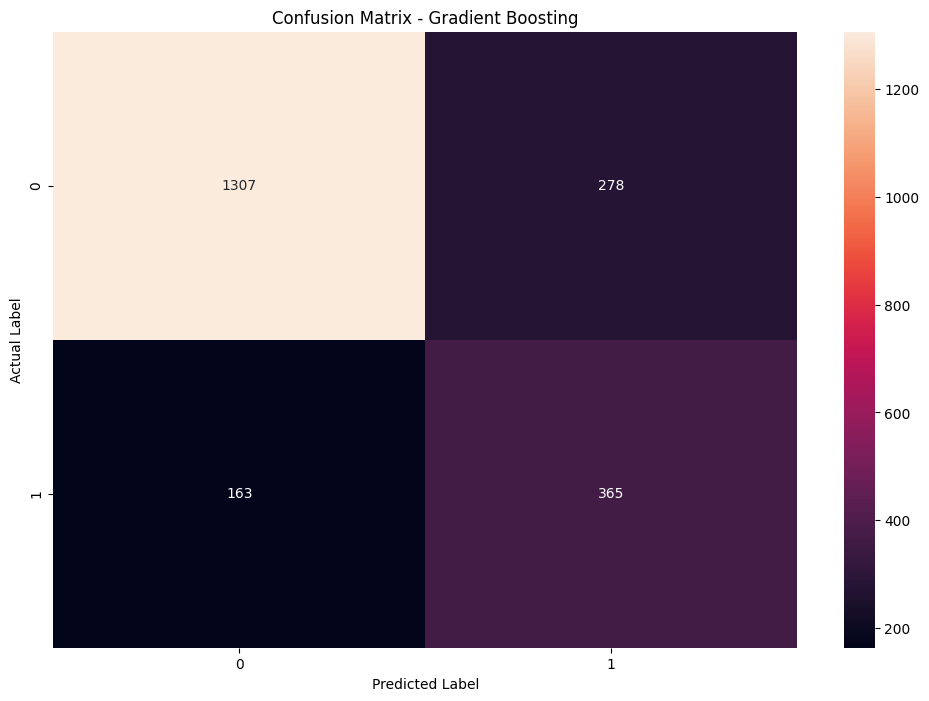

In [88]:
# Gradient Boosting
print('Accuracy: %.2f%%' % (accuracy_score(y_test, gb_y_predict) * 100 ))
print('Precision: %.2f%%' % (precision_score(y_test, gb_y_predict) * 100))
print('Recall: %.2f%%' % (recall_score(y_test, gb_y_predict) * 100))
print('F1_Score: %.2f%%' % (f1_score(y_test, gb_y_predict) * 100))
print(f'Gini Score : {roc_auc_score(y_test, gb_y_proba)}')

confusion_matrix_gb = confusion_matrix(y_test, gb_y_predict)
plt.figure(figsize=(12,8))
ax = plt.subplot()
sns.heatmap(confusion_matrix_gb, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_title('Confusion Matrix - Gradient Boosting')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

Support Vector Machine best predicted churn clients, correctly predicting 435 out of 528 (82.39%). <br><br>
I'm still **not** satisfied with that and want to achieve better results. It's time to optimize our models.

In [67]:
# Tuning SVM
grid = {
    'C':np.arange(1, 15,0.1),
    'kernel': ['linear'], 
}
Svc = RandomizedSearchCV(SVC(random_state=42,probability=True),
                             param_distributions = grid,
                             cv = 5,
                             n_iter = 30,
                             scoring = 'recall',random_state=42)
Svc.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(probability=True, random_state=42),
                   n_iter=30,
                   param_distributions={'C': array([ 1. ,  1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,
        2.1,  2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,
        3.2,  3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,
        4.3,  4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,
        5.4,  5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,
        6.5,  6.6,  6.7,  6.8,  6.9,  7....
        8.7,  8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,
        9.8,  9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8,
       10.9, 11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9,
       12. , 12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. ,
       13.1, 13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1,
       14.2, 14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9]),
                                        'kernel': ['linear']},
                   random_state=42, scoring='recall')

In [58]:
Svc.best_params_

NameError: name 'Svc' is not defined

In [ ]:
precision = 45

for key, value in Svc.best_params_.items():
    if isinstance(value, (int, float)):  # Check if value is a number
        print(f"{key}: {value:.{precision}f}")
    else:
        print(f"{key}: {value}")  # Print string values without formatting

In [58]:
#Best Hyperparamters
C= 12.800000000000011368683772161602973937988281250

In [59]:
tune_Svc = SVC(kernel='linear',C=12.800000000000011368683772161602973937988281250,probability=True)
tune_Svc.fit(X_train, y_train)
y_pred_svc = tune_Svc.predict(X_test)
y_proba=tune_Svc.predict_proba(X_test)[:,1]

Accuracy: 75.01%
Precision: 50.00%
Recall: 82.39%
F1_Score: 62.23%
Gini Score : 0.8575387152279896


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

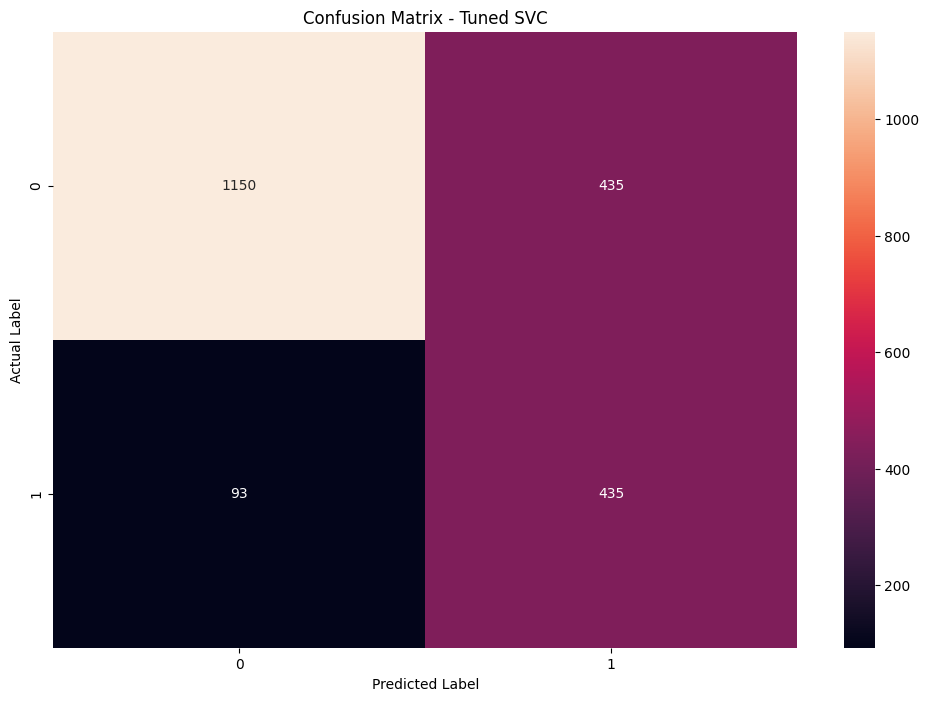

In [60]:
# Tuned SVC scores
print('Accuracy: %.2f%%' % (accuracy_score(y_test, y_pred_svc) * 100 ))
print('Precision: %.2f%%' % (precision_score(y_test, y_pred_svc) * 100))
print('Recall: %.2f%%' % (recall_score(y_test, y_pred_svc) * 100))
print('F1_Score: %.2f%%' % (f1_score(y_test, y_pred_svc) * 100))
print(f'Gini Score : {roc_auc_score(y_test, y_proba)}')

confusion_matrix_tuned_svc = confusion_matrix(y_test, y_pred_svc)

plt.figure(figsize=(12,8))
ax = plt.subplot()
sns.heatmap(confusion_matrix_tuned_svc, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_title('Confusion Matrix - Tuned SVC')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

In [ ]:
# Tuning Ada Boost
grid2 = {'n_estimators' : np.arange(50,1000,25),
       'learning_rate' : np.arange(0.01,1,0.1),
        "base_estimator__max_depth": [1, 2, 3]
        },
        
estimator = DecisionTreeClassifier(max_depth='base_estimator__max_depth',random_state=42)
adaboost = RandomizedSearchCV(AdaBoostClassifier(estimator=estimator,random_state=42),
                             param_distributions = grid2,
                             cv = 5,
                             n_iter = 30,
                             scoring='recall',
                             random_state=42)
adaboost.fit(X_train, y_train)

C:\python311\Lib\site-packages\sklearn\model_selection\_validation.py:674: FutureWarning:

Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.

C:\python311\Lib\site-packages\sklearn\model_selection\_validation.py:674: FutureWarning:

Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.

C:\python311\Lib\site-packages\sklearn\model_selection\_validation.py:674: FutureWarning:

Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.

C:\python311\Lib\site-packages\sklearn\model_selection\_validation.py:674: FutureWarning:

Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.

C:\python311\Lib\site-packages\sklearn\model_selection\_validation.p

C:\python311\Lib\site-packages\sklearn\model_selection\_validation.py:674: FutureWarning:

Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.

C:\python311\Lib\site-packages\sklearn\model_selection\_validation.py:674: FutureWarning:

Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.

C:\python311\Lib\site-packages\sklearn\model_selection\_validation.py:674: FutureWarning:

Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.

C:\python311\Lib\site-packages\sklearn\model_selection\_validation.py:674: FutureWarning:

Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.

C:\python311\Lib\site-packages\sklearn\model_selection\_validation.p

C:\python311\Lib\site-packages\sklearn\model_selection\_validation.py:674: FutureWarning:

Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.

C:\python311\Lib\site-packages\sklearn\model_selection\_validation.py:674: FutureWarning:

Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.

C:\python311\Lib\site-packages\sklearn\model_selection\_validation.py:674: FutureWarning:

Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.

C:\python311\Lib\site-packages\sklearn\model_selection\_validation.py:674: FutureWarning:

Parameter 'base_estimator' of AdaBoostClassifier is deprecated in favor of 'estimator'. See AdaBoostClassifier's docstring for more details.

C:\python311\Lib\site-packages\sklearn\model_selection\_validation.p

In [ ]:
adaboost.best_params_
precision=55
for key, value in adaboost.best_params_.items():
    if isinstance(value, (int, float)):  # Check if value is a number
        print(f"{key}: {value:.{precision}f}")
    else:
        print(f"{key}: {value}")  # Print string values without formatting

In [60]:
# Best Hyperparameters
n_estimators= 150
learning_rate= 0.4100000000000000310862446895043831318616867065429687500
base_estimator__max_depth= 1.00

In [61]:
estimator = DecisionTreeClassifier(max_depth=1,random_state=42)
tune_adaboost = AdaBoostClassifier(estimator=estimator,learning_rate=0.4100000000000000310862446895043831318616867065429687500,n_estimators=150)
tune_adaboost.fit(X_train, y_train)
y_pred = tune_adaboost.predict(X_test)
y_proba_ab=tune_adaboost.predict_proba(X_test)[:,1]

In [ ]:
# Tuned Ada Boost
print('Accuracy: %.2f%%' % (accuracy_score(y_test, y_pred) * 100 ))
print('Precision: %.2f%%' % (precision_score(y_test, y_pred) * 100))
print('Recall: %.2f%%' % (recall_score(y_test, y_pred) * 100))
print('F1_Score: %.2f%%' % (f1_score(y_test, y_pred) * 100))
print(f'Gini Score : {roc_auc_score(y_test, y_proba_ab)}')
confusion_matrix_tuned_adaboost = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,8))
ax = plt.subplot()
sns.heatmap(confusion_matrix_tuned_adaboost, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_title('Confusion Matrix - Tuned Ada Boost')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

In [ ]:
# Tuning Gradient Boosting
grid3 = {'n_estimators':np.arange(100,500,50),
        'learning_rate':[0.01,0.05,0.2,0.1,0.15,0.3,0.5],
        'min_samples_split':range(2, 20),
        'min_samples_leaf': range(10,40),
        'max_depth':[6,7,8],
         'subsample':np.arange(0.5, 0.8, 0.1)
        },

gradientboosting = RandomizedSearchCV(GradientBoostingClassifier(random_state=42),
                             param_distributions = grid3,
                             cv = 5,
                             n_iter = 30,
                             scoring = 'recall',random_state=42)
gradientboosting.fit(X_train, y_train)

In [ ]:
gradientboosting.best_params_
precision=60
for key, value in gradientboosting.best_params_.items():
    if isinstance(value, (int, float)):  # Check if value is a number
        print(f"{key}: {value:.{precision}f}")
    else:
        print(f"{key}: {value}")  # Print string values without formatting

In [ ]:
#Best Hyperparamters
subsample: 0.6999999999999999555910790149937383830547332763671875
n_estimators: 100
min_samples_split: 8
min_samples_leaf: 21
max_depth: 8
learning_rate: 0.01000000000000000020816681711721685132943093776702880859375

In [62]:
from sklearn.ensemble import GradientBoostingClassifier

tune_gradientboosting = GradientBoostingClassifier(
    subsample=0.6999999999999999555910790149937383830547332763671875,
    n_estimators=100,
    min_samples_split=8,
    min_samples_leaf=21,
    max_depth=8,
    learning_rate=0.01000000000000000020816681711721685132943093776702880859375,
    random_state=42
)

tune_gradientboosting.fit(X_train, y_train)

y_pred_gb = tune_gradientboosting.predict(X_test)
y_proba_gb = tune_gradientboosting.predict_proba(X_test)[:, 1]

In [ ]:
tune_gradientboosting = GradientBoostingClassifier(**gradientboosting.best_params_)
tune_gradientboosting.fit(X_train, y_train)
y_pred_gb = tune_gradientboosting.predict(X_test)
y_proba_gb=tune_gradientboosting.predict_proba(X_test)[:,1]

In [ ]:
# Tuned Gradient Boosting scores
print('Accuracy: %.2f%%' % (accuracy_score(y_test, y_pred_gb) * 100 ))
print('Precision: %.2f%%' % (precision_score(y_test, y_pred_gb) * 100))
print('Recall: %.2f%%' % (recall_score(y_test, y_pred_gb) * 100))
print('F1_Score: %.2f%%' % (f1_score(y_test, y_pred_gb) * 100))
print(f'Gini Score : {roc_auc_score(y_test, y_proba_gb)}')

confusion_matrix_tuned_gb = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(12,8))
ax = plt.subplot()
sns.heatmap(confusion_matrix_tuned_gb, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.set_title('Confusion Matrix - Tuned Gradient Boosting')
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Cross Validation to determine the Best Model

In [ ]:
#Encoding entire dataset

In [75]:
categorical_features=['PaymentMethod','Contract','InternetService']#to be one hot encoded
numerical_features=['TotalCharges','tenure','MonthlyCharges','NEW_Engaged','NEW_noProt','NEW_Young_Not_Engaged','NEW_TotalServices','NEW_FLAG_AutoPayment','NEW_AVG_Service_Fee']
ordinal_features=[]
for i in df.columns:
    if i not in categorical_features and i not in numerical_features and i !='Churn':
        ordinal_features.append(i)
        
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse=False)
numerical_transformer = StandardScaler().set_output(transform='pandas')
ordinal_transformer=OrdinalEncoder()

In [76]:
#Standardizing Numeric variables
X[numerical_features] = numerical_transformer.fit_transform(X[numerical_features])

In [77]:
#Ordinal Encoding varibales
X[ordinal_features] = ordinal_transformer.fit_transform(X[ordinal_features])

In [78]:
#One hot encoding variables
encoded_features= categorical_transformer.fit_transform(X[categorical_features])

C:\python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [79]:
X.drop(categorical_features,axis=1,inplace=True)

In [80]:
X_encoded = pd.DataFrame(encoded_features, columns=categorical_transformer.get_feature_names_out(categorical_features))

In [81]:
#reseting index before concatenating
X.reset_index(drop=True,inplace=True)
X_encoded.reset_index(drop=True,inplace=True)

In [82]:
X= pd.concat([X, X_encoded], axis=1)

In [83]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,0.0,0.0,1.0,0.0,-1.277445,0.0,1.0,0.0,2.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.066327,1.0,0.0,2.0,0.0,2.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,-1.236724,1.0,0.0,2.0,2.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.514251,0.0,1.0,2.0,0.0,2.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,-1.236724,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [72]:
# Transform Churns into binary values
y.replace({'Yes' : 1,
           'No' : 0}, inplace = True)
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [89]:
models = {
    "GradientBoosting": GradientBoostingClassifier(
        subsample=0.6999999999999999555910790149937383830547332763671875,
        n_estimators=100,
        min_samples_split=8,
        min_samples_leaf=21,
        max_depth=8,
        learning_rate=0.01000000000000000020816681711721685132943093776702880859375
    ),
    "AdaBoost": AdaBoostClassifier(
        n_estimators= 150,
        learning_rate= 0.4100000000000000310862446895043831318616867065429687500,
        base_estimator=DecisionTreeClassifier(max_depth=2)
    ),
    "SVM": SVC(
        kernel='linear',
        C=12.800000000000011368683772161602973937988281250,
        probability=True
    )
}

# Loop through models and evaluate each with SMOTE pipeline
for name, model in models.items():
    pipeline = ImbPipeline([
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=42)),
        ('model', model)
    ])

    scores = cross_val_score(pipeline, X, y, cv=5, scoring='recall')
    print(f"\n{name} Recall Scores: {scores}")
    print(f"{name} Mean Recall: {scores.mean():.4f}")


GradientBoosting Recall Scores: [0.72994652 0.70588235 0.66042781 0.72654155 0.67379679]
GradientBoosting Mean Recall: 0.6993


C:\python311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

C:\python311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

C:\python311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

C:\python311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.

C:\python311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.




AdaBoost Recall Scores: [0.56417112 0.56417112 0.55080214 0.57908847 0.56417112]
AdaBoost Mean Recall: 0.5645

SVM Recall Scores: [0.8315508  0.8368984  0.81283422 0.78552279 0.76470588]
SVM Mean Recall: 0.8063


## SVM produces consistent results

In [261]:
import shap
explainer = shap.KernelExplainer(tune_Svc.predict, X_train)

Using 7178 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [263]:
explainer = shap.Explainer(tune_gradientboosting)

In [264]:
# Calculate Shapley values
shap_values = explainer.shap_values(X_test)

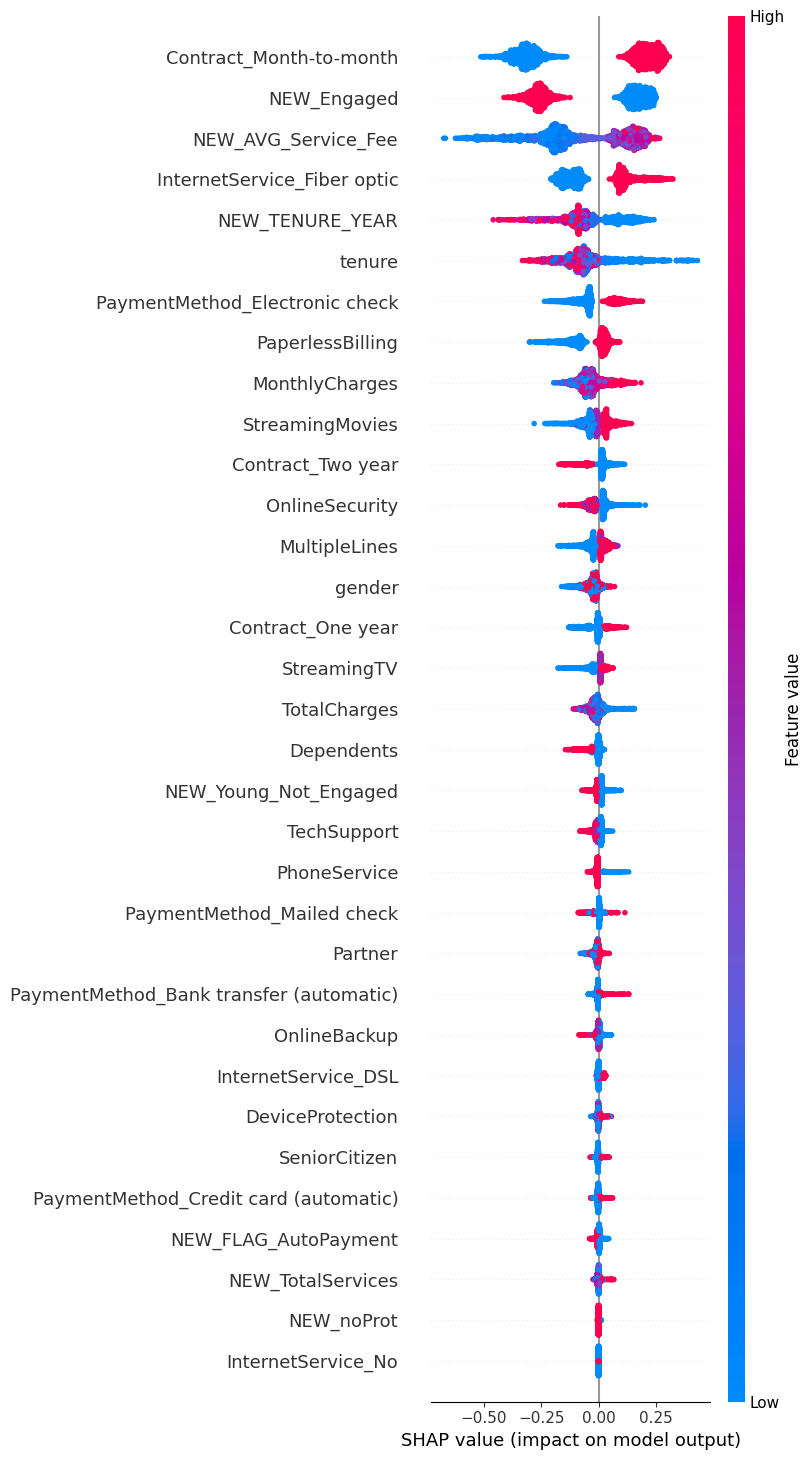

In [266]:
shap.summary_plot(shap_values, X_test,max_display=35)

# Conclusion<br>
After utilizing RandomizedSearchCV to improve recall scores,and using cross validation to select the best model we ended up with a tuned SVM model that has a recall of 82.39% on test data and 81% on entire data. <br><br>

SVC performs consistently well on test data and maintains a high recall on the entire dataset also the GINI score is also high around 85%.<br><br>

AdaBoost and Gradient Boosting show higher cross-validation scores on the entire dataset but have significantly lower performance on testing dataset, which could indicate overfitting to the training data.

Therefore, based on the balance between performance on testing dataset and generalization ability (cross-validation on entire dataset), SVM appears to be a strong candidate as the best model for predicting churn. It shows robust performance across both test data and the broader dataset.

Futher, Exploratory data analysis made it possible for us to draw a profile of clients that discontinue their subscriptions and the kind of services and contracts they usually sign for, which helps the company to make specific improvements and develop strategies to retain these clients.<br><br>